<a href="https://colab.research.google.com/github/Saul-Ochoa/Time-Series/blob/main/Banco%20Central%20de%20Reservas/PBI_BCRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Series del Banco Central de Reserva del Perú**

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from pmdarima import ARIMA

In [110]:
url_base="https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"
cod_ser="PN01770AM"   #[códigos de series mensuales]
formato="/json"
per="/2003-1/2023-8"
url=url_base+cod_ser+formato+per
print(url)

https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2003-1/2023-8


In [111]:
import requests
response=requests.get(url)
print(response)

<Response [200]>


In [112]:
response_json=response.json()
print(response_json)

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)', 'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI', 'dec': '1'}]}, 'periods': [{'name': 'Ene.2003', 'values': ['73.2223697356532']}, {'name': 'Feb.2003', 'values': ['71.079432278923']}, {'name': 'Mar.2003', 'values': ['74.3427231053258']}, {'name': 'Abr.2003', 'values': ['80.6677115046248']}, {'name': 'May.2003', 'values': ['83.222645844011']}, {'name': 'Jun.2003', 'values': ['80.853774469805']}, {'name': 'Jul.2003', 'values': ['79.2070171390158']}, {'name': 'Ago.2003', 'values': ['74.2120138543618']}, {'name': 'Sep.2003', 'values': ['73.8678353680876']}, {'name': 'Oct.2003', 'values': ['77.5989135108107']}, {'name': 'Nov.2003', 'values': ['75.5725386288336']}, {'name': 'Dic.2003', 'values': ['78.0097324133558']}, {'name': 'Ene.2004', 'values': ['75.9132669251778']}, {'name': 'Feb.2004', 'values': ['74.0974359154403']}, {'name': 'Mar.2004', 'values': ['78.6354629791467

In [113]:
for key in response_json.keys():
    print(key)

config
periods


In [114]:
periodos=response_json.get("periods")
price_index=[]
for i in periodos:
    valores_list=i['values']
    for w in valores_list:
        w=float(w)
        price_index.append(w)

#print(type(price_index[0]))
print(price_index)

[73.2223697356532, 71.079432278923, 74.3427231053258, 80.6677115046248, 83.222645844011, 80.853774469805, 79.2070171390158, 74.2120138543618, 73.8678353680876, 77.5989135108107, 75.5725386288336, 78.0097324133558, 75.9132669251778, 74.0974359154403, 78.6354629791467, 84.0944721319617, 86.5105702285255, 83.2874590103565, 82.1067513163865, 77.5146229152149, 77.4025938277684, 79.6324551624725, 82.7195635167179, 85.6503020745209, 79.9791610934839, 80.1344599066734, 81.3964129865707, 87.0734470255748, 92.1414551036507, 88.4557729993011, 87.2766006292957, 82.9894831129745, 82.0878665294671, 84.8027239326644, 90.4951176179881, 91.5459266918293, 85.6590424919578, 84.6285220854951, 91.2286928400679, 91.7780023638019, 97.7619063414799, 95.072899809632, 92.9616001230902, 91.5547627296281, 88.769329600051, 92.1822066698177, 94.7874212319493, 99.4183587606666, 89.9525619891583, 88.6681022105582, 96.7214346263447, 96.6364193147801, 104.746678845017, 101.254568601752, 102.545139242961, 100.1286684412

In [115]:
fechas=[]
for i in periodos:
    nombres=i['name']
    fechas.append(nombres)

print(fechas)

['Ene.2003', 'Feb.2003', 'Mar.2003', 'Abr.2003', 'May.2003', 'Jun.2003', 'Jul.2003', 'Ago.2003', 'Sep.2003', 'Oct.2003', 'Nov.2003', 'Dic.2003', 'Ene.2004', 'Feb.2004', 'Mar.2004', 'Abr.2004', 'May.2004', 'Jun.2004', 'Jul.2004', 'Ago.2004', 'Sep.2004', 'Oct.2004', 'Nov.2004', 'Dic.2004', 'Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov.2009', 'Di

In [116]:
import pandas as pd
diccionario= {"Fechas":fechas, "Valores":price_index}
print(diccionario)
df = pd.DataFrame(diccionario)
df.head()

{'Fechas': ['Ene.2003', 'Feb.2003', 'Mar.2003', 'Abr.2003', 'May.2003', 'Jun.2003', 'Jul.2003', 'Ago.2003', 'Sep.2003', 'Oct.2003', 'Nov.2003', 'Dic.2003', 'Ene.2004', 'Feb.2004', 'Mar.2004', 'Abr.2004', 'May.2004', 'Jun.2004', 'Jul.2004', 'Ago.2004', 'Sep.2004', 'Oct.2004', 'Nov.2004', 'Dic.2004', 'Ene.2005', 'Feb.2005', 'Mar.2005', 'Abr.2005', 'May.2005', 'Jun.2005', 'Jul.2005', 'Ago.2005', 'Sep.2005', 'Oct.2005', 'Nov.2005', 'Dic.2005', 'Ene.2006', 'Feb.2006', 'Mar.2006', 'Abr.2006', 'May.2006', 'Jun.2006', 'Jul.2006', 'Ago.2006', 'Sep.2006', 'Oct.2006', 'Nov.2006', 'Dic.2006', 'Ene.2007', 'Feb.2007', 'Mar.2007', 'Abr.2007', 'May.2007', 'Jun.2007', 'Jul.2007', 'Ago.2007', 'Sep.2007', 'Oct.2007', 'Nov.2007', 'Dic.2007', 'Ene.2008', 'Feb.2008', 'Mar.2008', 'Abr.2008', 'May.2008', 'Jun.2008', 'Jul.2008', 'Ago.2008', 'Sep.2008', 'Oct.2008', 'Nov.2008', 'Dic.2008', 'Ene.2009', 'Feb.2009', 'Mar.2009', 'Abr.2009', 'May.2009', 'Jun.2009', 'Jul.2009', 'Ago.2009', 'Sep.2009', 'Oct.2009', 'Nov

,Fechas,Valores
0,Ene.2003,73.222370
1,Feb.2003,71.079432
2,Mar.2003,74.342723
3,Abr.2003,80.667712
4,May.2003,83.222646


In [117]:
# Mapear los nombres de los meses en español a los nombres de los meses en inglés
meses_dict = {'Ene.': 'Jan', 'Feb.': 'Feb', 'Mar.': 'Mar', 'Abr.': 'Apr', 'May.': 'May', 'Jun.': 'Jun', 'Jul.': 'Jul', 'Ago.': 'Aug', 'Sep.': 'Sep', 'Oct.': 'Oct', 'Nov.': 'Nov', 'Dic.': 'Dec'}

In [118]:
df['Fechas']=pd.to_datetime(df['Fechas'].replace(meses_dict,regex=True),format='%b%Y')
df.head()

,Fechas,Valores
0,2003-01-01,73.222370
1,2003-02-01,71.079432
2,2003-03-01,74.342723
3,2003-04-01,80.667712
4,2003-05-01,83.222646


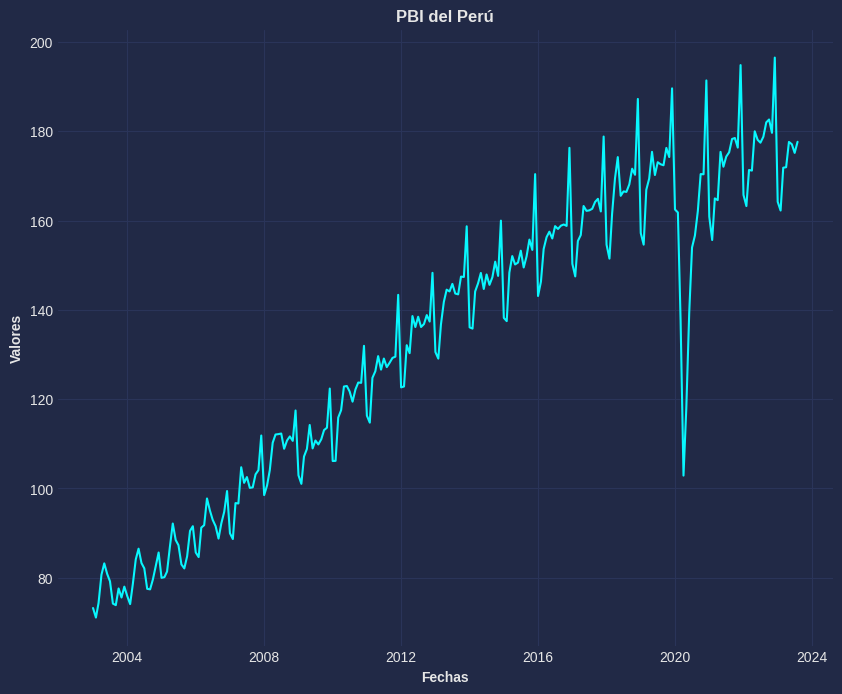

In [119]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Fechas',y='Valores')
plt.title('PBI del Perú',fontsize=12,weight='bold')
plt.xlabel('Fechas',fontsize=10,weight='bold')
plt.ylabel('Valores',fontsize=10,weight='bold')
plt.show()

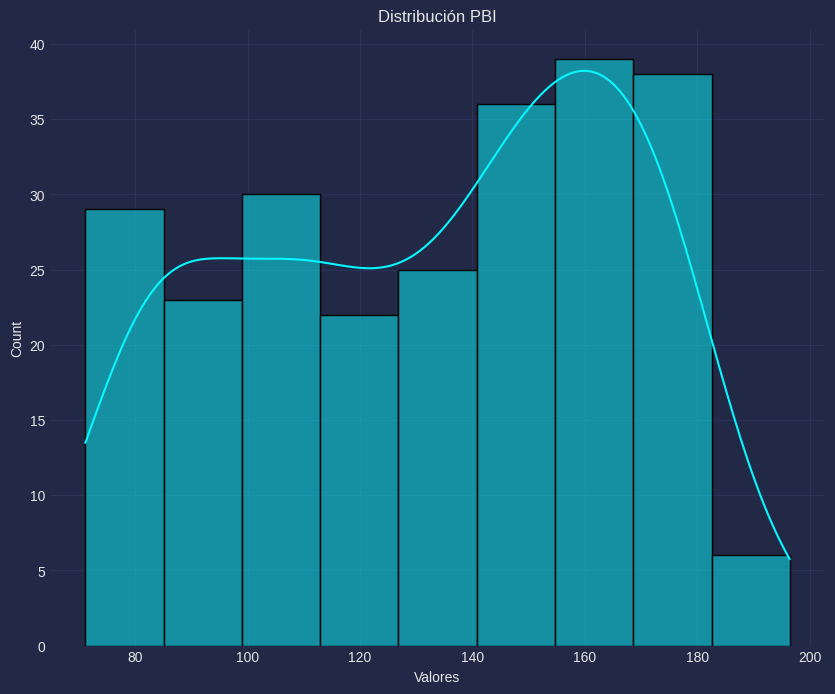

In [120]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Valores',kde=True)
plt.title('Distribución PBI')
plt.show()

In [121]:
# Establecer la columna de fechas como índice
#df.set_index('Fechas', inplace=True)

# Cambiar la frecuencia a mensual ('M') y rellenar los valores faltantes
#df = df.resample('M').asfreq()

# Mostrar las primeras filas del DataFrame
#print(df.head())

In [122]:
df.set_index('Fechas',inplace=True)
df = df.resample('MS').asfreq()
df=df.sort_index()
df.head()

,Valores
Fechas,
2003-01-01,73.222370
2003-02-01,71.079432
2003-03-01,74.342723
2003-04-01,80.667712
2003-05-01,83.222646


In [123]:
df.isnull().sum()

Valores    0
dtype: int64

In [139]:
(df.index == pd.date_range(
                    start = df.index.min(),
                    end   = df.index.max(),
                    freq= df.index.freq)
                ).all()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [124]:
fin_train = '2021-01-01'
fin_validacion = '2022-06-01'
df_train=df.loc[: fin_train,:]
df_val=df.loc[fin_train:fin_validacion,:]
df_test=df.loc[fin_validacion:,:]

In [125]:
print(f'Fecha Train : {df_train.index.min()}---{df_train.index.max()} (n={len(df_train)})')
print(f'Fecha Validation : {df_val.index.min()}---{df_val.index.max()} (n={len(df_val)})')
print(f'Fecha Test : {df_test.index.min()}---{df_test.index.max()} (n={len(df_test)})')

Fecha Train : 2003-01-01 00:00:00---2021-01-01 00:00:00 (n=217)
Fecha Validation : 2021-01-01 00:00:00---2022-06-01 00:00:00 (n=18)
Fecha Test : 2022-06-01 00:00:00---2023-08-01 00:00:00 (n=15)


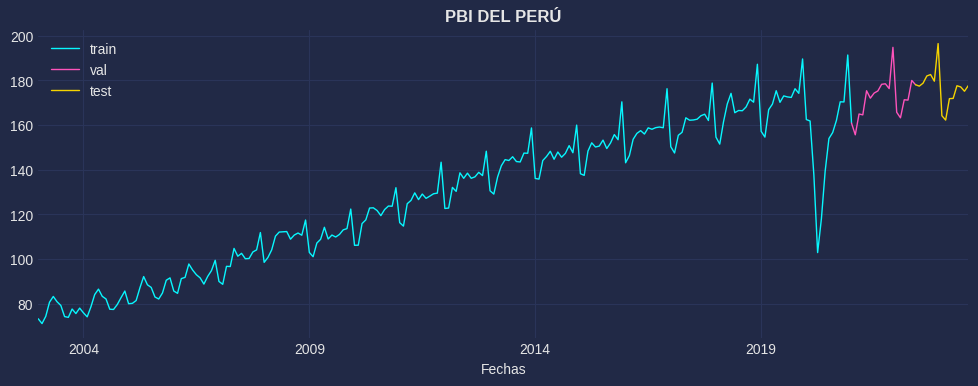

In [126]:
fig, ax = plt.subplots(figsize=(12, 4))
df_train['Valores'].plot(ax=ax, label='train', linewidth=1)
df_val['Valores'].plot(ax=ax, label='val', linewidth=1)
df_test['Valores'].plot(ax=ax, label='test', linewidth=1)
ax.set_title('PBI DEL PERÚ',fontsize=12,weight='bold')
ax.legend()
plt.show()

In [127]:
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

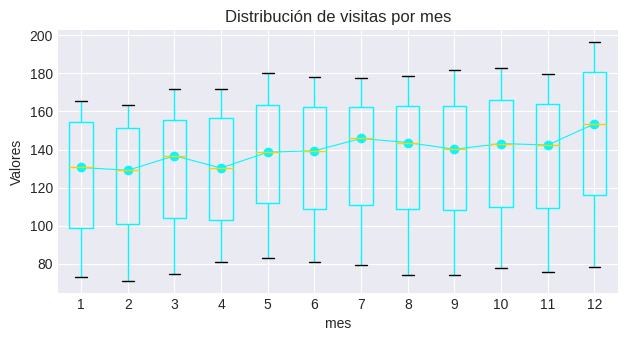

In [128]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df['mes'] = df.index.month
df.boxplot(column='Valores', by='mes', ax=ax,)
df.groupby('mes')['Valores'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Valores')
ax.set_title('Distribución de visitas por mes')
fig.suptitle('')
plt.show()

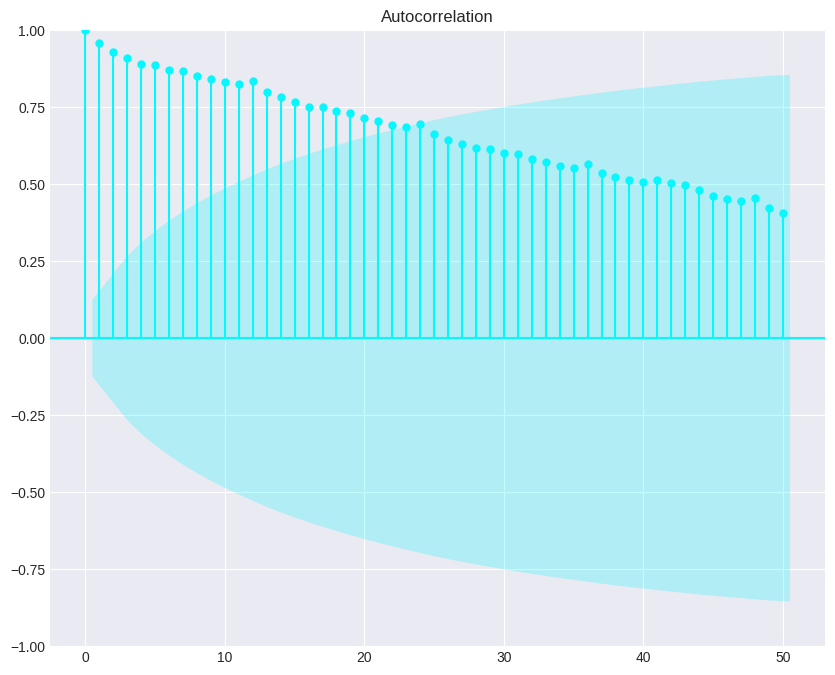

In [129]:
fig,ax=plt.subplots(figsize=(10,8))
plot_acf(df['Valores'],ax=ax,lags=50)
plt.show()

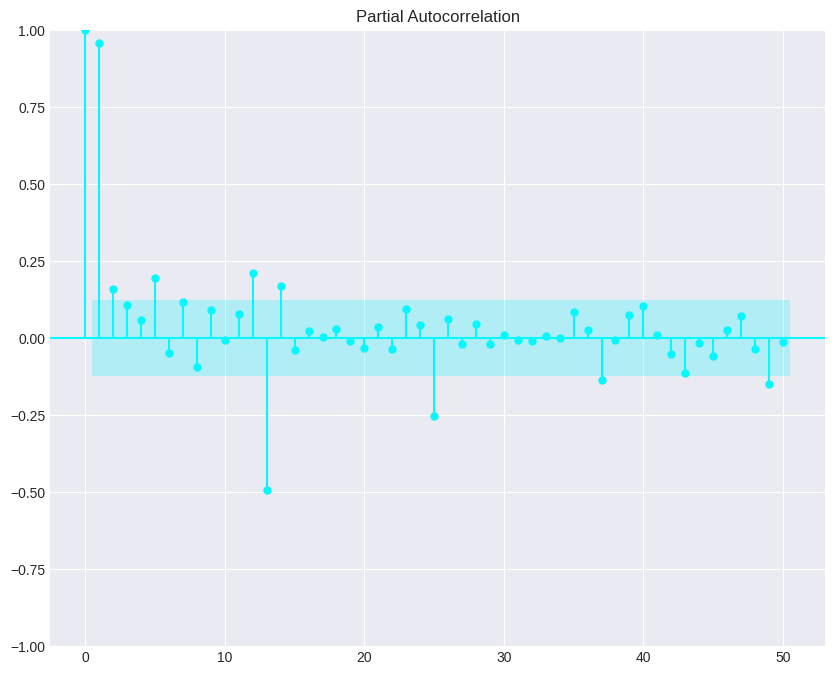

In [130]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(df['Valores'], ax=ax, lags=50)
plt.show()

In [131]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = SARIMAX(endog = df_train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
modelo_res = modelo.fit(disp=0)
warnings.filterwarnings("default")
modelo_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Valores   No. Observations:                  217
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -603.943
Date:                            Wed, 25 Oct 2023   AIC                           1217.886
Time:                                    20:04:42   BIC                           1234.476
Sample:                                01-01-2003   HQIC                          1224.597
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1947      0.117     -1.657      0.097      -0.425       0.036
ma.L1          0.5212      0.132      3.960      0.000       0.263       0.779
ar.S.L12       0.0238      0.392      0.061      0.952      -0.745       0.792
ma.S.L12      -0.4271      0.309     -1.381      0.167      -1.033       0.179
sigma2        21.5810      0.872     24.753      0.000      19.872      23.290
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              4393.71
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                            -2.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
predicciones_statsmodels = modelo_res.get_forecast(steps=len(df_test)).predicted_mean
predicciones_statsmodels.name = 'predicciones_statsmodels'
display(predicciones_statsmodels.head(4))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-02-01    157.662305
2021-03-01    148.024225
2021-04-01    128.721408
2021-05-01    139.912913
Freq: MS, Name: predicciones_statsmodels, dtype: float64

In [133]:
predicciones_statsmodels

2021-02-01    157.662305
2021-03-01    148.024225
2021-04-01    128.721408
2021-05-01    139.912913
2021-06-01    150.502808
2021-07-01    160.072102
2021-08-01    161.530109
2021-09-01    165.012573
2021-10-01    171.274317
2021-11-01    170.485773
2021-12-01    189.478953
2022-01-01    160.227613
2022-02-01    157.741332
2022-03-01    148.295692
2022-04-01    129.390016
Freq: MS, Name: predicciones_statsmodels, dtype: float64

<Axes: ylabel='predicciones_statsmodels'>

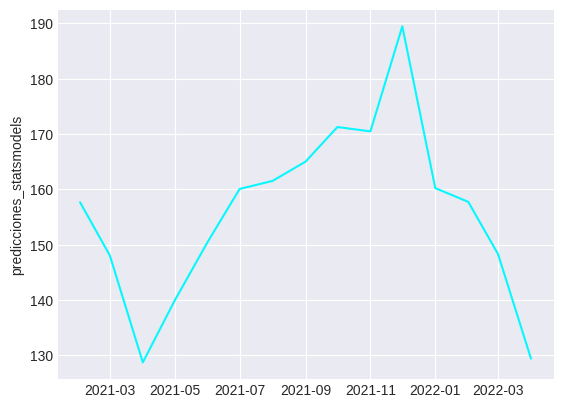

In [134]:
sns.lineplot(predicciones_statsmodels)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


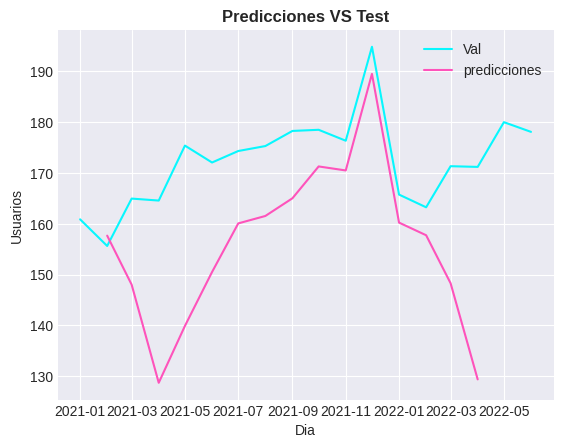

In [135]:
sns.lineplot(data=df_val,x=df_val.index,y='Valores',label='Val')
sns.lineplot(predicciones_statsmodels,label='predicciones')
plt.legend()
plt.title('Predicciones VS Test',fontsize=12,weight='bold')
plt.ylabel('Usuarios')
plt.xlabel('Dia')
plt.show()

In [136]:
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = Sarimax(order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
modelo.fit(y=df_train)
modelo.summary()
warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
predicciones_skforecast = modelo.predict(steps=len(df_test))
display(predicciones_skforecast.head(4))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pred
2021-02-01,157.662305
2021-03-01,148.024225
2021-04-01,128.721408
2021-05-01,139.912913


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


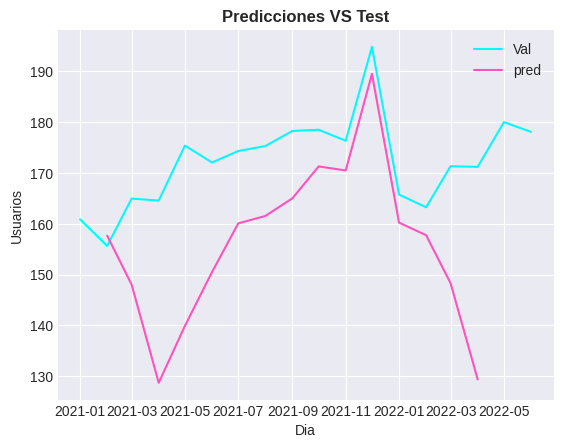

In [138]:
sns.lineplot(data=df_val,x=df_val.index,y='Valores',label='Val')
sns.lineplot(data=predicciones_skforecast,x=predicciones_skforecast.index,y='pred',label='pred')
plt.legend()
plt.title('Predicciones VS Test',fontsize=12,weight='bold')
plt.ylabel('Usuarios')
plt.xlabel('Dia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'visitas_web'
             )

forecaster.fit(y=df_train['Valores'])
forecaster

ForecasterAutoreg 
Regressor: Ridge(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 14 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2003-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-10-25 20:08:04 
Last fit date: 2023-10-25 20:08:04 
Skforecast version: 0.10.1 
Python version: 3.10.12 
Forecaster id: visitas_web 

In [144]:
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = df['Valores'],
                            initial_train_size = len(df.loc[:fin_validacion]),
                            steps              = 7,
                            refit              = False,
                            fixed_train_size   = False,
                            metric             = 'mean_absolute_error',
                            verbose            = True,
                            show_progress      = False
                        )

print(f'Error backtest: {metrica}')
predicciones.head(5)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 234
Number of observations used for backtesting: 14
    Number of folds: 2
    Number of steps per fold: 7
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2003-01-01 00:00:00 -- 2022-06-01 00:00:00  (n=234)
    Validation: 2022-07-01 00:00:00 -- 2023-01-01 00:00:00  (n=7)
Fold: 1
    Training:   2003-01-01 00:00:00 -- 2022-06-01 00:00:00  (n=234)
    Validation: 2023-02-01 00:00:00 -- 2023-08-01 00:00:00  (n=7)

Error backtest: 2.844035294401164


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pred
2022-07-01,179.229727
2022-08-01,177.237540
2022-09-01,180.132795
2022-10-01,179.904333
2022-11-01,176.385192


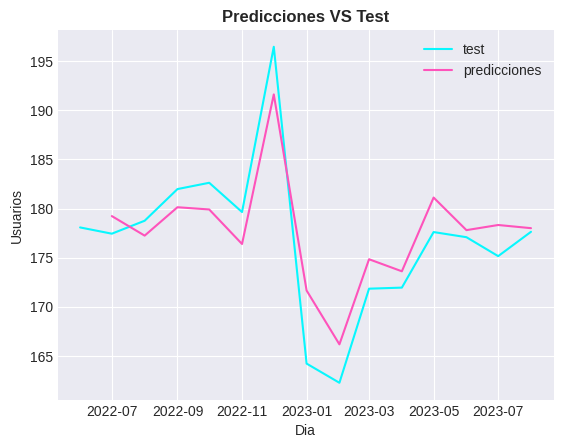

In [146]:
sns.lineplot(data=df_test,x=df_test.index,y='Valores',label='test')
sns.lineplot(data=predicciones,x=predicciones.index,y='pred',label='predicciones')
plt.legend()
plt.title('Predicciones VS Test',fontsize=12,weight='bold')
plt.ylabel('Usuarios')
plt.xlabel('Dia')
plt.show()

In [148]:
# Grid search de hiperparámetros
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 14,
                 transformer_y = StandardScaler(),
                 forecaster_id = 'visitas_web'
             )

# Hiperparámetros del regresor
param_grid = {'alpha': np.logspace(-3, 3, 10)}

# Lags utilizados como predictores
lags_grid = [7, 14, 21, [7, 14, 21]]

resultados_grid = grid_search_forecaster(
                      forecaster         = forecaster,
                      y                  = df.loc[:fin_validacion, 'Valores'],
                      param_grid         = param_grid,
                      lags_grid          = lags_grid,
                      steps              = 7,
                      metric             = 'mean_absolute_error',
                      refit              = False,
                      initial_train_size = len(df_train),
                      fixed_train_size   = False,
                      return_best        = True,
                      show_progress      = True,
                      verbose            = False
                  )

Number of models compared: 40.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/10 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'alpha': 2.154434690031882}
  Backtesting metric: 5.912563093760216



In [149]:
resultados_grid.head(10)

,lags,params,mean_absolute_error,alpha
5,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 2.154434690031882},5.912563,2.154435
6,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 10.0},6.076641,10.000000
4,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 0.46415888336127775},6.112550,0.464159
3,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 0.1},6.175476,0.100000
2,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 0.021544346900318832},6.190436,0.021544
1,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 0.004641588833612777},6.193731,0.004642
0,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 0.001},6.194445,0.001000
7,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 46.41588833612773},6.753951,46.415888
8,"[1, 2, 3, 4, 5, 6, 7]",{'alpha': 215.44346900318823},10.204419,215.443469
27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'alpha': 46.41588833612773},11.697862,46.415888


In [150]:
forecaster

ForecasterAutoreg 
Regressor: Ridge(alpha=2.154434690031882, random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: StandardScaler() 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2003-01-01 00:00:00'), Timestamp('2022-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'alpha': 2.154434690031882, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 123, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2023-10-25 20:11:41 
Last fit date: 2023-10-25 20:11:44 
Skforecast version: 0.10.1 
Python version: 3.10.12 
Forecaster id: visitas_web 

In [152]:
metrica, predicciones = backtesting_forecaster(
                            forecaster         = forecaster,
                            y                  = df['Valores'],
                            initial_train_size = len(df.loc[:fin_validacion, :]),
                            steps              = 7,
                            refit              = False,
                            fixed_train_size   = False,
                            metric             = 'mean_absolute_error',
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/2 [00:00<?, ?it/s]

Error backtest: 5.7490952389527195


In [153]:
predicciones

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pred
2022-07-01,178.758875
2022-08-01,176.846879
2022-09-01,174.134620
2022-10-01,175.587355
2022-11-01,175.055455
2022-12-01,176.433498
2023-01-01,176.737086
2023-02-01,171.797865
2023-03-01,175.320563
2023-04-01,174.666608


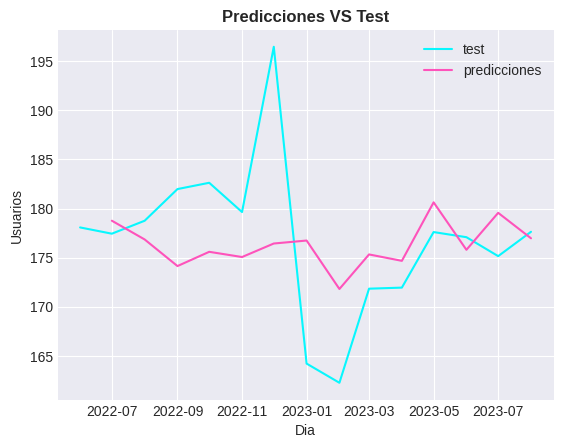

In [154]:
sns.lineplot(data=df_test,x=df_test.index,y='Valores',label='test')
sns.lineplot(data=predicciones,x=predicciones.index,y='pred',label='predicciones')
plt.legend()
plt.title('Predicciones VS Test',fontsize=12,weight='bold')
plt.ylabel('Usuarios')
plt.xlabel('Dia')
plt.show()

In [155]:
# ForecasterSarimax
# ==============================================================================
forecaster_sarimax = ForecasterSarimax(
                         regressor     = ARIMA(order=(14, 0, 0), maxiter=250),
                         fit_kwargs    = {'disp': 0},
                         forecaster_id = 'visitas_web_sarimax'
                     )

# Backtest ARIMA
# ==============================================================================
metrica, predicciones = backtesting_sarimax(
                            forecaster         = forecaster_sarimax,
                            y                  = df['Valores'],
                            initial_train_size = len(df.loc[:fin_validacion]),
                            steps              = 7,
                            metric             = 'mean_absolute_error',
                            refit              = False,
                            fixed_train_size   = False,
                            verbose            = False,
                            show_progress      = True
                        )

print(f'Error backtest: {metrica}')
predicciones.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:214: IgnoredArgumentWarning: Argument/s ['disp'] ignored since they are not used by the regressor's `fit` method. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=IgnoredArgumentWarning)
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Error backtest: 2.85612763940267


,pred
2022-07-01,178.747211
2022-08-01,176.351049
2022-09-01,178.450474
2022-10-01,177.296547
2022-11-01,172.551910


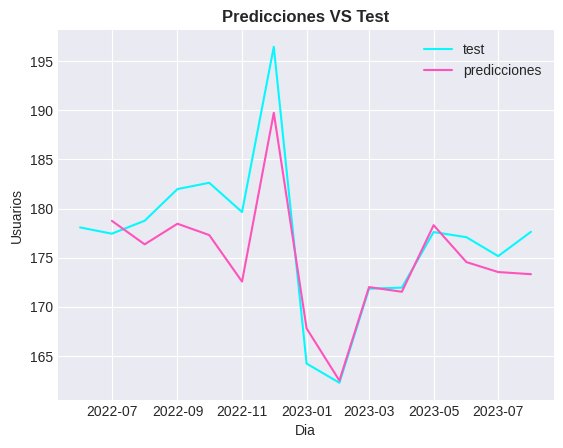

In [156]:
sns.lineplot(data=df_test,x=df_test.index,y='Valores',label='test')
sns.lineplot(data=predicciones,x=predicciones.index,y='pred',label='predicciones')
plt.legend()
plt.title('Predicciones VS Test',fontsize=12,weight='bold')
plt.ylabel('Usuarios')
plt.xlabel('Dia')
plt.show()